# Basic Text Analysis with WordCloud, Tf-idf and LDA

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.corpora as corpora
import gensim
from pprint import pprint
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

In [2]:
#Reading dataset
df=pd.read_csv("Womens Clothing E-Commerce Reviews-short.csv")
#Removing null entries
df.dropna(inplace=True)
df

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
10,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are 3152 words in the combination of all review.


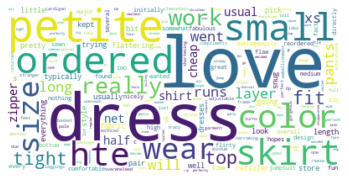

In [3]:
#Building a word cloud with all the reviews
text = " ".join(review for review in df['Review Text'])
print ("There are {} words in the combination of all review.".format(len(text)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
#Top 50 words with tf-idf and their score
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review Text'])
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 50
top_features = [features[i] for i in indices[:top_n]]
score_of_top_feature =  [vectorizer.idf_[i] for i in indices[:top_n]]
print ('Top 50 Feature=',top_features)
print('Tf-idf score=',score_of_top_feature)

Top 50 Feature= ['material', 'ok', 'jumpsuit', 'jkeep', 'its', 'into', 'initially', 'imo', 'if', 'idea', 'hopes', 'high', 'half', 'great', 'gorgeous', 'going', 'go', 'garment', 'fun', 'full', 'front', 'from', 'frame', 'found', 'flirty', 'flaw', 'flare', 'last', 'later', 'layer', 'make', 'nicely', 'nice', 'net', 'needless', 'narrowing', 'msallet', 'mintue', 'medium', 'matvehd', 'mathced', 'zip', 'major', 'layers', 'lot', 'loose', 'looks', 'look', 'longer', 'like']
Tf-idf score= [2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.6094379124341005, 2.609437912434100

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#Applying LDA on the review text and finding various topics
data= df['Review Text']
# Bag of words
token_data = []
for review in data:
        tokens =  review.split()
        token_data.append(tokens)
# Dictionary creation with list of unique words
dictionary = corpora.Dictionary(token_data)
# term frequency 
term_freq_corpus = [dictionary.doc2bow(text) for text in token_data]
# number of topics-50
num_topics = 50
# LDA model
lda_model = gensim.models.LdaMulticore(corpus=term_freq_corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)
# Print the Keyword in the 50 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[term_freq_corpus]

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(35,
  '0.048*"i" + 0.036*"it" + 0.027*"on" + 0.027*"and" + 0.026*"is" + '
  '0.025*"hte" + 0.018*"my" + 0.018*"color" + 0.017*"with" + 0.016*"trying"'),
 (14,
  '0.028*"the" + 0.015*"of" + 0.014*"and" + 0.014*"not" + 0.014*"this" + '
  '0.013*"very" + 0.012*"is" + 0.011*"but" + 0.011*"a" + 0.010*"i"'),
 (45,
  '0.073*"the" + 0.040*"this" + 0.035*"of" + 0.029*"and" + 0.027*"but" + '
  '0.026*"very" + 0.026*"i" + 0.024*"a" + 0.023*"not" + 0.022*"skirt"'),
 (34,
  '0.011*"the" + 0.009*"i" + 0.007*"s" + 0.007*"petite" + 0.007*"for" + '
  '0.006*"that" + 0.006*"or" + 0.006*"love" + 0.005*"perfectly" + '
  '0.005*"(snug,"'),
 (22,
  '0.003*"are" + 0.003*"also" + 0.003*"doesn\'t" + 0.003*"compaint" + '
  '0.003*"charcoal" + 0.003*"carbon" + 0.003*"bit" + 0.003*"big," + '
  '0.003*"everything" + 0.003*"always)"'),
 (23,
  '0.003*"are" + 0.003*"also" + 0.003*"doesn\'t" + 0.003*"compaint" + '
  '0.003*"charcoal" + 0.003*"carbon" + 0.003*"bit" + 0.003*"big," + '
  '0.003*"everything" + 0.003*"a

In [6]:
# Visualize the results
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, 
                              corpus=term_freq_corpus, 
                              dictionary=dictionary,mds='mmds')
pyLDAvis.display(vis)

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
